In [17]:

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)



I have always wondered is the death rate among the black people and white people in America is like a random value or teh death rate in the black people was always higher than the death rate among the white people.I would also like to investigate the age-adjusted death rate and life expectancy at birth in America. This dataset consists of age-adjusted death rate and life expectancy at birth by race and sex from the year 1900 to 2014. The dataset contains the death rate of two major races of America for each year beginning from 1900 to 2014.

Age adjustment can make the different groups more comparable. A "standard" population distribution is used to adjust death and hospitalization rates. The age-adjusted rates are rates that would have existed if the population under study had the same age distribution as the "standard" population. This avoids age as an confounding factors.

the link to the dataset is https://catalog.data.gov/dataset/age-adjusted-death-rates-and-life-expectancy-at-birth-all-races-both-sexes-united-sta-1900


# Data Exploration


In [18]:
death_rate = Table().read_table("d.csv")
death_rate


Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
2015,All Races,Both Sexes,nan,733.1
2014,All Races,Both Sexes,78.9,724.6
2013,All Races,Both Sexes,78.8,731.9
2012,All Races,Both Sexes,78.8,732.8
2011,All Races,Both Sexes,78.7,741.3
2010,All Races,Both Sexes,78.7,747
2009,All Races,Both Sexes,78.5,749.6
2008,All Races,Both Sexes,78.2,774.9
2007,All Races,Both Sexes,78.1,775.3
2006,All Races,Both Sexes,77.8,791.8


In [19]:
#the year 2015 has nan value. So it should be removed.
death_rate = death_rate.where("Year",are.not_equal_to(2015))
death_rate

Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
2014,All Races,Both Sexes,78.9,724.6
2013,All Races,Both Sexes,78.8,731.9
2012,All Races,Both Sexes,78.8,732.8
2011,All Races,Both Sexes,78.7,741.3
2010,All Races,Both Sexes,78.7,747
2009,All Races,Both Sexes,78.5,749.6
2008,All Races,Both Sexes,78.2,774.9
2007,All Races,Both Sexes,78.1,775.3
2006,All Races,Both Sexes,77.8,791.8
2005,All Races,Both Sexes,77.6,815


# What is the trend in the death rate and life expectancy at birth for each particular race?

In [20]:
#Forming a table specifically to black and white people without gender specific
Death_rate_in_black_people = death_rate.where("Race",are.equal_to("Black")).where("Sex",are.equal_to("Both Sexes"))
Death_rate_in_white_people = death_rate.where("Race",are.equal_to("White")).where("Sex",are.equal_to("Both Sexes"))


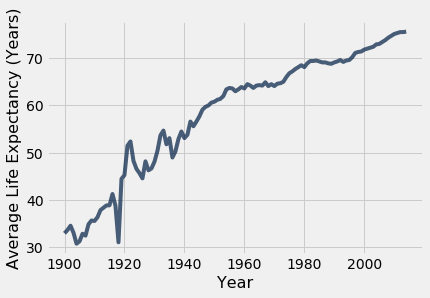

In [21]:
#in order to find the trend, we are going to use a line plot
Death_rate_in_black_people.drop(["Race","Sex","Age-adjusted Death Rate"]).plot("Year")

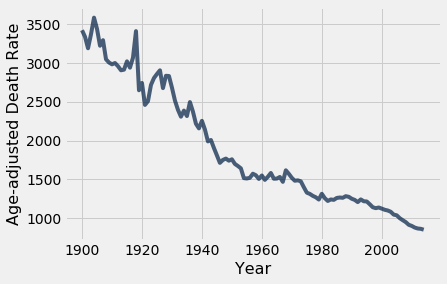

In [22]:
Death_rate_in_black_people.drop(["Race","Sex","Average Life Expectancy (Years)"]).plot("Year")

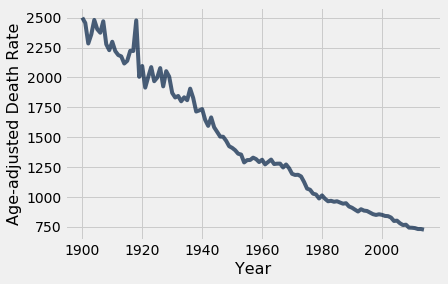

In [23]:
Death_rate_in_white_people.drop(["Race","Sex","Average Life Expectancy (Years)"]).plot("Year")

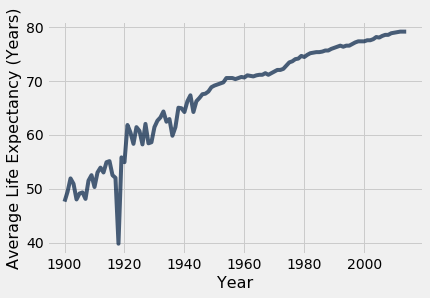

In [24]:
Death_rate_in_white_people.drop(["Race","Sex","Age-adjusted Death Rate"]).plot("Year")

Looking at the trend, In both communities, the death rate as reduced and the life expectancy rate increased. This is just a an overall trend. Looking at both community, we can clearly say that the life expectancy rate increased as the death rate decreased. But this is just an association.

# Is there an association between death rate and the life expectancy rate? If so, quantify it together with it's least square line

For this part of the question we will be studying the death rate in all races and both sexes. The plots in the question above clearly shows that the increase in average life expectancy in Years corresponds to decrease in agep-adjusted death rate in both community.

In [12]:
#In order to see the relationship between the age-adjusted death rate and the life expectancy, we need a scatter plot.
#Death rate table should be restricted to all races and both sexes.
All_death_rate = death_rate.where("Race","All Races").where("Sex","Both Sexes")
All_death_rate

Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
2014,All Races,Both Sexes,78.9,724.6
2013,All Races,Both Sexes,78.8,731.9
2012,All Races,Both Sexes,78.8,732.8
2011,All Races,Both Sexes,78.7,741.3
2010,All Races,Both Sexes,78.7,747
2009,All Races,Both Sexes,78.5,749.6
2008,All Races,Both Sexes,78.2,774.9
2007,All Races,Both Sexes,78.1,775.3
2006,All Races,Both Sexes,77.8,791.8
2005,All Races,Both Sexes,77.6,815


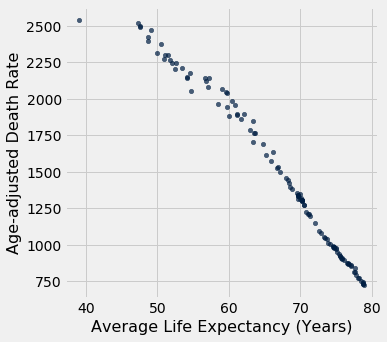

In [13]:
#Drawing the scatter plot
All_death_rate.drop(["Year","Race","Sex"]).scatter(0)

The association is almost linear and it seems like it is negatively associated. In other words, the above average value of Age-adjusted death rate is associated with below average value of Average life Expectancy.

In [14]:
#quanifying the correlation coefficient
#need to convert the variables into standar unit
#standard_unit function
#correlation function
def std(x):
    return (x-np.mean(x))/np.std(x)

def correlation(x,y):
    return np.mean(x*y)


In [15]:
Age_adjusted_death_rateSTD = std(All_death_rate.column(4))
Average_life_expectancySTD = std(All_death_rate.column(3))
correlation_coefficient = correlation(Average_life_expectancySTD,Age_adjusted_death_rateSTD)
r = correlation_coefficient
r

-0.98870625907320164

The correlation coefficient looks almost perfect. It shows strong negative correlation.

In [23]:
#computing the regression line
#function to compute slope

def slope1(r,x,y):
    return r*((np.std(y)/np.std(x)))

#funtion to compute intercept

def intercept(slope,x,y):
    return np.mean(y)-(slope*np.mean(x))

#function to compute regression estimate

def regression_estimate(x,m,c):
    return m*x+c

In [24]:
m = slope1(r,All_death_rate.column(3),All_death_rate.column(4))
c = intercept(m,All_death_rate.column(3),All_death_rate.column(4))
print([m,c])

[-56.66435492153235, 5255.2464502521307]


In [25]:
#computing the estimates and attaching it to the table
regression_estimates = regression_estimate(All_death_rate.column(3),m,c)
Table_with_estimates = All_death_rate.with_columns("Estimates",regression_estimates)
Table_with_estimates


Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate,Estimates
2014,All Races,Both Sexes,78.9,724.6,784.429
2013,All Races,Both Sexes,78.8,731.9,790.095
2012,All Races,Both Sexes,78.8,732.8,790.095
2011,All Races,Both Sexes,78.7,741.3,795.762
2010,All Races,Both Sexes,78.7,747,795.762
2009,All Races,Both Sexes,78.5,749.6,807.095
2008,All Races,Both Sexes,78.2,774.9,824.094
2007,All Races,Both Sexes,78.1,775.3,829.76
2006,All Races,Both Sexes,77.8,791.8,846.76
2005,All Races,Both Sexes,77.6,815,858.093


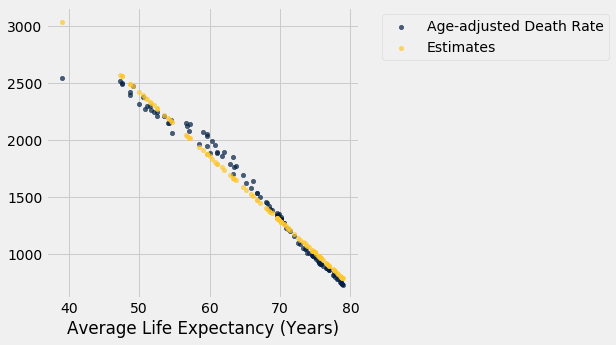

In [26]:
#plotting the regression line
Table_with_estimates.drop(["Year","Race","Sex"]).scatter(0)

the yellow line is the regression line.

# Is the overall difference in death rate between the white people and black people random?

## Why is this question difficult to answer?

Since we have the data for each race for each particular year, we are going to consider each year as one data point. Next, we are going to aggregate the age_adjusted death rate by race and compute the difference. For this part we will consider all gender for each race. We know these death rates are not random samples as they are actual data obtained. However, we are going to assume that the death rates are like random samples from a population containing all possible death rates. If we consider disease outbreak or climate changes as a confounding factors, they have both communities not specifically a particular community. Hence, it is safe to assume these death rates as random samples from population containing all possible death rates.

In [61]:
#forming a table containing the deathn rates and matching it up with each community.
community_based_death_rate = death_rate.where("Race",are.contained_in(make_array("White","Black"))).where("Sex","Both Sexes").drop([2,3,0])
community_based_death_rate.show(15)

Race,Age-adjusted Death Rate
Black,849.3
Black,860.8
Black,864.8
Black,877.1
Black,898.2
Black,912.8
Black,947.6
Black,972
Black,997.9
Black,1035.1


In [62]:
"""Group a table based on the races and average the collect
ted list of death rate"""
community_based_death_rate.group("Race",np.average)

Race,Age-adjusted Death Rate average
Black,1889.91
White,1453.1


It seems like the average death rate in the black people are higher. We need to find out out whether this is just due to chance or not. We have the entire data available. From here, we have to we have to figure out whether the difference between the death rate in the white people and black people is due to chance variations or not. So we have to compare with all kind of possibilities which we have no idea about.

AB testing is the best way to analyze the data set. In AB test we consider the black population and white population is similar. hence, the death rate in any year in white population is also like the death rate in any year in any population. In other words, if we see death rate value, we must not able to guess with high certainty to which community it belongs to. So we are going to conduct the random permutation test. We can say A refers to the sample of White and B refers to the sample of the Black. Through this test we are going to study whether these two samples are from the same distribution

In [70]:
#function to conduct random permutation.
#it shuffles the rows and group them according to the category and averages the values
#it the difference between the aggregated mean is the difference.
def permutate(tbl):
    """This funtion takes the original tbl containing two columns
    The first column should contain the category and the second column 
    should contain the death rate.
    """
    shuffled_column = tbl.sample(with_replacement = False).column(1)
    original_shuffled_table = tbl.with_columns("Shuffled",shuffled_column).drop(1)
    grouped = original_shuffled_table.group(0,np.average)
    test_statistic = grouped.column(1).item(0)-grouped.column(1).item(1)
    return test_statistic

#### Null Hypothesis : The distribution of the death rates in the white community and black community is similar. Any difference is just due to chance.

#### Alternative Hypothesis : The distribution of the death rates in the white community and black community is not similar. The                              death rate in the black community seemed to be hgher that the white community.

The test statistic will be the difference in mean of death rate between the black and white community for the entire data fro 1900 to 2014

In [71]:
grouped_mean = community_based_death_rate.group("Race",np.average)

In [72]:
# this is the observed test statistic we obtained.
observed_test_statistic = grouped_mean.column(1).item(0)-grouped_mean.column(1).item(1)
observed_test_statistic



436.80521739130404

We are going to simulate the test statistic using the random permuation method. We are assuming the death rate in these communities belongs to the same distribution. That is the assumption made in the null. Next, we will replicate this process 10000 to get distribution of the test statistic under the assumption made by the null.

In [67]:
#simulation of the test statistics under the assumption made by the null hypothesis.4
#repetition of 100000
# a table with only differences in the mean is produced
differences = make_array()

for i in np.arange(10000):
    
    difference = permutate(community_based_death_rate)
    
    differences = np.append(differences,difference)
    
Difference = Table().with_column("Difference in Mean",differences)
Difference

Difference in Mean
27.0139
2.94609
-32.5652
-47.9774
85.3148
-6.31478
66.7722
232.48
158.83
68.08


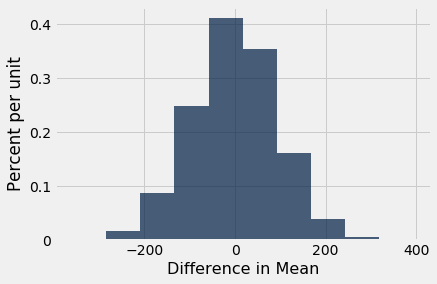

In [68]:
#plotting a histogram to see the distribution
Difference.hist()

P-value basically calculates the proportion of obtaining the test statistic greater or equal observed test statistic assuming null is true in the direction of the alternative

In [69]:
#significance test at 5% significance level
#proportion of falsely rejecting if null is true
p_value = np.count_nonzero(differences >= observed_test_statistic)
p_value

0

# Conclusion



Since, the p-value obtained is less than 5%, we have failed to reject the null. It is very unlikely to obtain such mean difference in death rate between the death rate in black people and in white people. It more plausible say that the death rate in the Black community is on average higher in the overall last 30 years. So the death rates in the black community and the white community are not like samples from the population with same distribution